<a href="https://colab.research.google.com/github/mariabandeira/Projeto_Final_IIA/blob/main/SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install  seaborn

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk
from tqdm.notebook import tqdm
from collections import Counter

In [4]:
from nltk import pos_tag
from nltk.tokenize import word_tokenize

nltk.download('punkt')  

nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\biabc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\biabc\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [5]:
!pip install transformers

Defaulting to user installation because normal site-packages is not writeable


In [6]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

## Sentiment Analysis

In [7]:
# neg_df = pd.read_csv('/content/NEGATIVE_B006K2ZZ7K.csv', sep=';')
neg_df = pd.read_csv('datasets/NEGATIVE_B006K2ZZ7K.csv', sep=';')
# pos_df = pd.read_csv('/content/POSITIVE_B006K2ZZ7K.csv', sep=';')
pos_df = pd.read_csv('datasets/POSITIVE_B006K2ZZ7K.csv', sep=';')

In [8]:
neg_df.head()

,username,title,model,verified,date,region,text,stars,id
0,Cyn,Would not recommend,0,Verified Purchase,"July 24, 2013",United States,\r\nThe taffy arrived in one big lump. The wax...,1.0,B006K2ZZ7K
1,Machelle,Could be better,0,Verified Purchase,"June 16, 2016",United States,\r\nSoft taffy in a large variety of flavors. ...,3.0,B006K2ZZ7K
2,Lewis,Good taffy but sticks to wrapper,0,Verified Purchase,"April 17, 2013",United States,\r\nThe taffy was received on time and in good...,2.0,B006K2ZZ7K
3,TERA ENDRES,Don’t buy!!!,0,Verified Purchase,"November 6, 2018",United States,\r\nI opened the box and the salt water taffy ...,1.0,B006K2ZZ7K
4,Claire M,I did enjoy some of the flavors so they get tw...,0,Verified Purchase,"June 21, 2017",United States,\r\nLots of the candy arrived poorly wrapped a...,2.0,B006K2ZZ7K


In [9]:
pos_df.head()

,username,title,model,verified,date,region,text,stars,id
0,mbb0623,This salt Water Taffy assortment is the absolu...,0,Verified Purchase,"September 13, 2015",United States,\r\nThis salt Water Taffy assortment is the ab...,5.0,B006K2ZZ7K
1,Mrs. V. M. Bruss,Good taffy. Will last s a while,0,Verified Purchase,"May 29, 2013",United States,\r\nI bought this for my son's graduation part...,4.0,B006K2ZZ7K
2,dmb,"Buy it, you'll like it.",0,Verified Purchase,"November 23, 2013",United States,"\r\nSo many flavors, some I've never had. I w...",5.0,B006K2ZZ7K
3,David C. Sullivan,Great! Just as good as the expensive brands!,0,Verified Purchase,"June 20, 2012",United States,\r\nThis saltwater taffy had great flavors and...,5.0,B006K2ZZ7K
4,Amazon Customer,A different taffy!,0,Verified Purchase,"April 28, 2021",United States,\r\nThe flavors are definitely different they'...,4.0,B006K2ZZ7K


In [10]:
df = (pd.concat([neg_df, pos_df], ignore_index=True)
     .assign(origem=lambda x: ['negative'] * len(neg_df) + ['positive'] * len(pos_df)))

In [11]:
df.head()

,username,title,model,verified,date,region,text,stars,id,origem
0,Cyn,Would not recommend,0,Verified Purchase,"July 24, 2013",United States,\r\nThe taffy arrived in one big lump. The wax...,1.0,B006K2ZZ7K,negative
1,Machelle,Could be better,0,Verified Purchase,"June 16, 2016",United States,\r\nSoft taffy in a large variety of flavors. ...,3.0,B006K2ZZ7K,negative
2,Lewis,Good taffy but sticks to wrapper,0,Verified Purchase,"April 17, 2013",United States,\r\nThe taffy was received on time and in good...,2.0,B006K2ZZ7K,negative
3,TERA ENDRES,Don’t buy!!!,0,Verified Purchase,"November 6, 2018",United States,\r\nI opened the box and the salt water taffy ...,1.0,B006K2ZZ7K,negative
4,Claire M,I did enjoy some of the flavors so they get tw...,0,Verified Purchase,"June 21, 2017",United States,\r\nLots of the candy arrived poorly wrapped a...,2.0,B006K2ZZ7K,negative


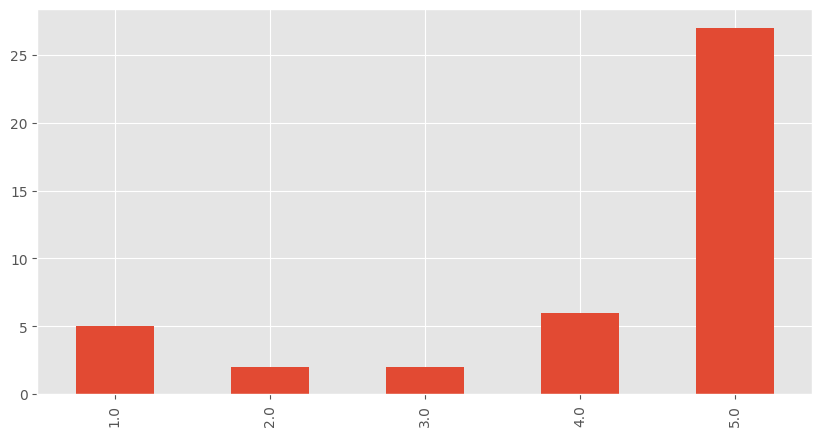

In [12]:
ax = df['stars'].value_counts().sort_index().plot(kind='bar', title='', figsize=(10,5))
ax.set_xlabel('')
plt.show()

### Basic NLTK

In [13]:
example = df['text'][7]
print(example)


Just awful....



In [14]:
tokens = nltk.word_tokenize(example)

In [15]:
#token pos
tagged = nltk.pos_tag(tokens)

In [16]:
nltk.download('maxent_ne_chunker') 
nltk.download('averaged_perceptron_tagger')  

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\biabc\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\biabc\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [17]:
nltk.download('words')

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\biabc\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [18]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint() #pretty print

(S Just/RB awful/JJ ..../NNS)


### Pretrained Model

In [19]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

C:\Users\biabc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [20]:
def polarity_scores_roberta(example):
  encoded_text = tokenizer(example, return_tensors='pt') # output should be pytorch tensors(vectors)
  output = model(**encoded_text) # passing the enconded(tokenized) text into RoBERTa
  scores = output[0][0].detach().numpy()
  scores = softmax(scores) #converts the scores into probabilities
  scores_dict = {
    'roberta_neg': scores[0],
    'roberta_neu': scores[1],
    'roberta_pos': scores[2]
  }

  return scores_dict

In [21]:
df = df.rename(columns={'id': 'product_id'})

In [22]:
df['Id'] = df.index

In [23]:
df = df.dropna()

In [24]:
!pip install ipywidgets

Defaulting to user installation because normal site-packages is not writeable


In [25]:
!jupyter nbextension enable --py widgetsnbextension

usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir]
               [--paths] [--json] [--debug]
               [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subcommand     the subcommand to launch

options:
  -h, --help     show this help message and exit
  --version      show the versions of core jupyter packages and exit
  --config-dir   show Jupyter config dir
  --data-dir     show Jupyter data dir
  --runtime-dir  show Jupyter runtime dir
  --paths        show all Jupyter paths. Add --json for machine-readable
                 format.
  --json         output paths as machine-readable json
  --debug        output debug information about paths

Available subcommands: kernel kernelspec migrate run troubleshoot

Jupyter command `jupyter-nbextension` not found.


In [26]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
  try:
    text = row['text']
    myid = row['Id']
    roberta_result = polarity_scores_roberta(text)
    res[myid] = roberta_result
  except RuntimeError:
    print(f'Broke for id {myid}')

  0%|          | 0/37 [00:00<?, ?it/s]

In [27]:
results_df = pd.DataFrame(res).T

In [28]:
results_df

,roberta_neg,roberta_neu,roberta_pos
0,0.934816,0.057157,0.008027
1,0.916286,0.076291,0.007423
2,0.088879,0.290511,0.620609
3,0.877001,0.112434,0.010565
4,0.137900,0.252092,0.610008
5,0.864869,0.122268,0.012863
6,0.633289,0.321335,0.045376
7,0.938871,0.053954,0.007176
9,0.002706,0.008852,0.988442
10,0.075734,0.184677,0.739589


In [29]:
#results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')

In [30]:
results_df

,Id,roberta_neg,roberta_neu,roberta_pos,username,title,model,verified,date,region,text,stars,product_id,origem
0,0,0.934816,0.057157,0.008027,Cyn,Would not recommend,0,Verified Purchase,"July 24, 2013",United States,\r\nThe taffy arrived in one big lump. The wax...,1.0,B006K2ZZ7K,negative
1,1,0.916286,0.076291,0.007423,Machelle,Could be better,0,Verified Purchase,"June 16, 2016",United States,\r\nSoft taffy in a large variety of flavors. ...,3.0,B006K2ZZ7K,negative
2,2,0.088879,0.290511,0.620609,Lewis,Good taffy but sticks to wrapper,0,Verified Purchase,"April 17, 2013",United States,\r\nThe taffy was received on time and in good...,2.0,B006K2ZZ7K,negative
3,3,0.877001,0.112434,0.010565,TERA ENDRES,Don’t buy!!!,0,Verified Purchase,"November 6, 2018",United States,\r\nI opened the box and the salt water taffy ...,1.0,B006K2ZZ7K,negative
4,4,0.137900,0.252092,0.610008,Claire M,I did enjoy some of the flavors so they get tw...,0,Verified Purchase,"June 21, 2017",United States,\r\nLots of the candy arrived poorly wrapped a...,2.0,B006K2ZZ7K,negative
5,5,0.864869,0.122268,0.012863,Amanda,"Large bag, not great",0,Verified Purchase,"August 15, 2017",United States,"\r\nLarge bag, however the taffy is not very g...",3.0,B006K2ZZ7K,negative
6,6,0.633289,0.321335,0.045376,-A.,Hard as a rock!,0,Verified Purchase,"January 4, 2015",United States,"\r\nHard as a rock. Tried the ""soften it in th...",1.0,B006K2ZZ7K,negative
7,7,0.938871,0.053954,0.007176,Nagatha,One Star,0,Verified Purchase,"December 26, 2016",United States,\r\nJust awful....\r\n,1.0,B006K2ZZ7K,negative
8,9,0.002706,0.008852,0.988442,mbb0623,This salt Water Taffy assortment is the absolu...,0,Verified Purchase,"September 13, 2015",United States,\r\nThis salt Water Taffy assortment is the ab...,5.0,B006K2ZZ7K,positive
9,10,0.075734,0.184677,0.739589,Mrs. V. M. Bruss,Good taffy. Will last s a while,0,Verified Purchase,"May 29, 2013",United States,\r\nI bought this for my son's graduation part...,4.0,B006K2ZZ7K,positive


In [31]:
results_df['roberta_pos'].sum()

25.980482

In [32]:
results_df['roberta_neu'].sum()

4.4824033

In [33]:
results_df['roberta_neg'].sum()

6.5371156

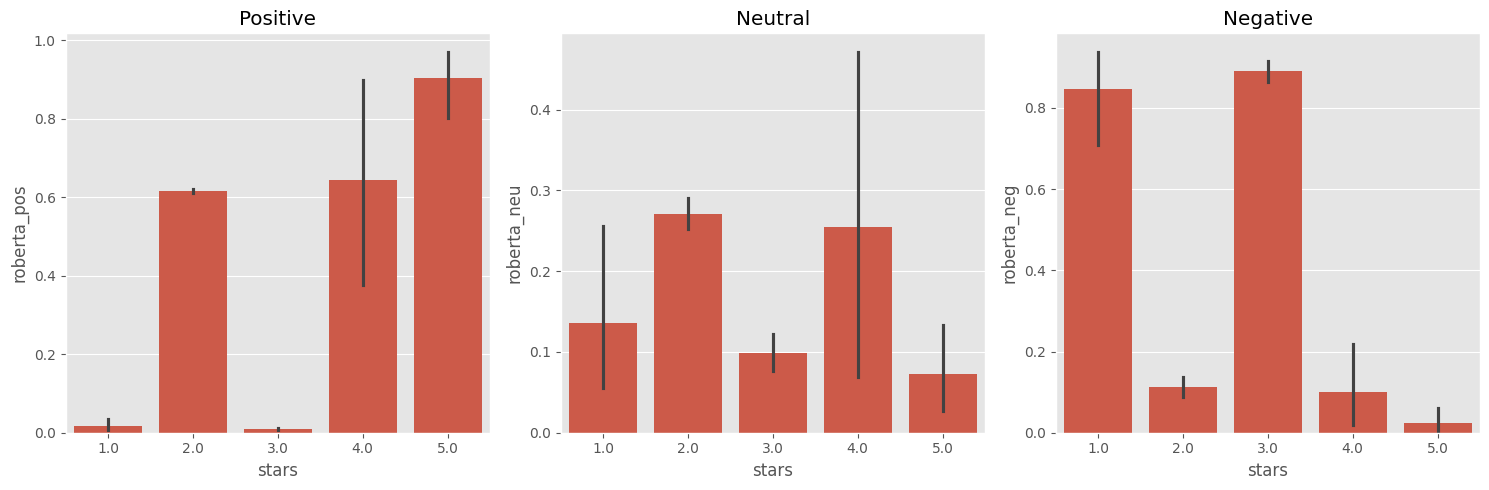

In [34]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
sns.barplot(data=results_df, x='stars', y='roberta_pos', ax=axs[0])
sns.barplot(data=results_df, x='stars', y='roberta_neu', ax=axs[1])
sns.barplot(data=results_df, x='stars', y='roberta_neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [35]:
!pip install textblob

Defaulting to user installation because normal site-packages is not writeable


In [36]:
from textblob import Word, TextBlob


In [37]:
!pip install spacy

Defaulting to user installation because normal site-packages is not writeable


In [38]:
import spacy
spacy.cli.download("en_core_web_sm") 


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [39]:
import string
import spacy.cli

positive_text = []
negative_text = []

for index, row in results_df.iterrows():
    if row['roberta_neg'] > row['roberta_pos']:
        negative_text.append(row['text'])
    else:
        positive_text.append(row['text'])

positive_text = ' '.join(positive_text)

negative_text = ' '.join(negative_text)


positive_text = positive_text.lower()
negative_text = negative_text.lower()

nlp = spacy.load('en_core_web_sm')
doc_p = nlp(positive_text) #positive doc
doc_n = nlp(negative_text) #negative doc

# adding adjectives only restriction
p_notadjectives = [token.text for token in doc_p if token.pos_ != "ADJ"]
n_notadjectives = [token.text for token in doc_n if token.pos_ != "ADJ"]
p_adjectives = [token.text for token in doc_p if token.pos_ == "ADJ"]
n_adjectives = [token.text for token in doc_n if token.pos_ == "ADJ"]

stopwords = nltk.corpus.stopwords.words('english')
punctuation = string.punctuation

wp = Word(positive_text)
lemma_pos = TextBlob(positive_text)
" ". join([w.lemmatize() for w in lemma_pos.words])

wn = Word(negative_text)
lemma_neg = TextBlob(negative_text)
" ". join([w.lemmatize() for w in lemma_neg.words])

pos_tokens = word_tokenize(positive_text)
neg_tokens = word_tokenize(negative_text)

pos_tokens = [word for word in pos_tokens if word not in stopwords and word in p_adjectives]
neg_tokens = [word for word in neg_tokens if word not in stopwords and word in n_adjectives]


clean_pos_tokens = []
clean_neg_tokens = []

for token in pos_tokens:
    clean_token = ''.join(char for char in token if char not in punctuation)
    if clean_token:
        clean_pos_tokens.append(clean_token)

for token in neg_tokens:
    clean_token = ''.join(char for char in token if char not in punctuation)
    if clean_token:
        clean_neg_tokens.append(clean_token)

In [40]:
pos_tokens_nofilter = [word for word in pos_tokens if word not in stopwords ]
neg_tokens_nofilter = [word for word in neg_tokens if word not in stopwords]

clean_pos_tokens_nf = []
clean_neg_tokens_nf = []

for token in pos_tokens:
    clean_token = ''.join(char for char in token if char not in punctuation)
    if clean_token:
        clean_pos_tokens_nf.append(clean_token)

for token in neg_tokens:
    clean_token = ''.join(char for char in token if char not in punctuation)
    if clean_token:
        clean_neg_tokens_nf.append(clean_token)

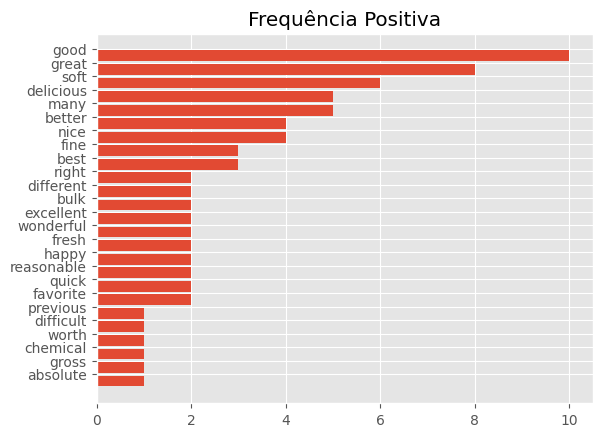

In [41]:
pos_freq = dict(Counter(clean_pos_tokens))
#pos_freq.pop('q')
#pos_freq.pop('pra')
pos_popular_words = sorted(pos_freq, key = pos_freq.get, reverse = True)

plt.barh(range(25), [pos_freq[w] for w in reversed(pos_popular_words[0:25])])
plt.yticks([x + 0.5 for x in range(25)], reversed(pos_popular_words[0:25]))
plt.title('Frequência Positiva')
plt.show()

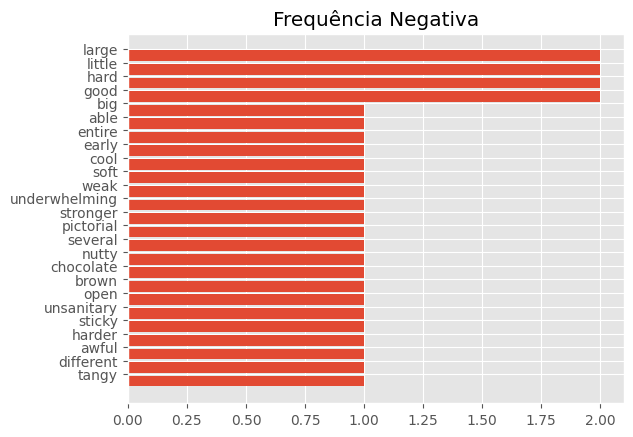

In [42]:
neg_freq = dict(Counter(clean_neg_tokens))
#neg_freq.pop('q')
pos_popular_words = sorted(neg_freq, key = neg_freq.get, reverse = True)

plt.barh(range(25), [neg_freq[w] for w in reversed(pos_popular_words[0:25])])
plt.yticks([x + 0.5 for x in range(25)], reversed(pos_popular_words[0:25]))
plt.title('Frequência Negativa')
plt.show()

In [43]:
def filter_words_by_pos(words_list, pos_class):
    tagged_words = pos_tag(word_tokenize(' '.join(words_list)))
    filtered_words = [word for word, pos in tagged_words if pos == pos_class]
    return filtered_words

# Exemplo de uso da função
pos_class = 'NN'  # Substantivos (nouns)
filtered_pos_nouns = filter_words_by_pos(clean_pos_tokens, pos_class)
filtered_neg_nouns = filter_words_by_pos(clean_neg_tokens, pos_class)
print(filtered_pos_nouns)
print(filtered_neg_nouns)

['fine', 'chemical', 'absolute', 'sweet', 'tasty', 'honest', 'bulk', 'rubbery', 'bulk', 'fair', 'wild', 'delightful', 'excellent', 'wonderful', 'happier', 'yummy', 'excellent', 'good', 'favorite']
['cool', 'underwhelming', 'chocolate', 'harder', 'tangy', 'good']


In [44]:
def filter_words_by_pos(words_list, pos_class):
    tagged_words = pos_tag(words_list)
    filtered_words = [word for word, pos in tagged_words if pos == pos_class]
    return filtered_words

# Exemplo de uso da função
pos_classes = ('JJ', 'JJR', 'JJS')  # Adjetivos
filtered_pos_nouns = filter_words_by_pos(clean_pos_tokens_nf, pos_class)
filtered_neg_nouns = filter_words_by_pos(clean_neg_tokens_nf, pos_class)
print(filtered_pos_nouns)
print(filtered_neg_nouns)

['fine', 'chemical', 'absolute', 'sweet', 'tasty', 'honest', 'bulk', 'rubbery', 'bulk', 'fair', 'wild', 'delightful', 'excellent', 'wonderful', 'happier', 'yummy', 'excellent', 'good', 'favorite']
['cool', 'underwhelming', 'chocolate', 'harder', 'tangy', 'good']


In [45]:
# pos_freq = dict(Counter(filtered_pos_nouns))
# #pos_freq.pop('q')
# #pos_freq.pop('pra')
# pos_popular_words = sorted(pos_freq, key = pos_freq.get, reverse = True)

# plt.barh(range(25), [pos_freq[w] for w in reversed(pos_popular_words[0:25])])
# plt.yticks([x + 0.5 for x in range(25)], reversed(pos_popular_words[0:25]))
# plt.title('Frequência Positiva')
# plt.show()

In [46]:
# neg_freq = dict(Counter(filtered_neg_nouns))
# #neg_freq.pop('q')
# #neg_freq.pop('pra')
# neg_popular_words = sorted(neg_freq, key = neg_freq.get, reverse = True)

# plt.barh(range(14), [neg_freq[w] for w in reversed(neg_popular_words[0:14])])
# plt.yticks([x + 0.5 for x in range(14)], reversed(neg_popular_words[0:14]))
# plt.title('Frequência Negativa')
# plt.show()

### Combine and Compare

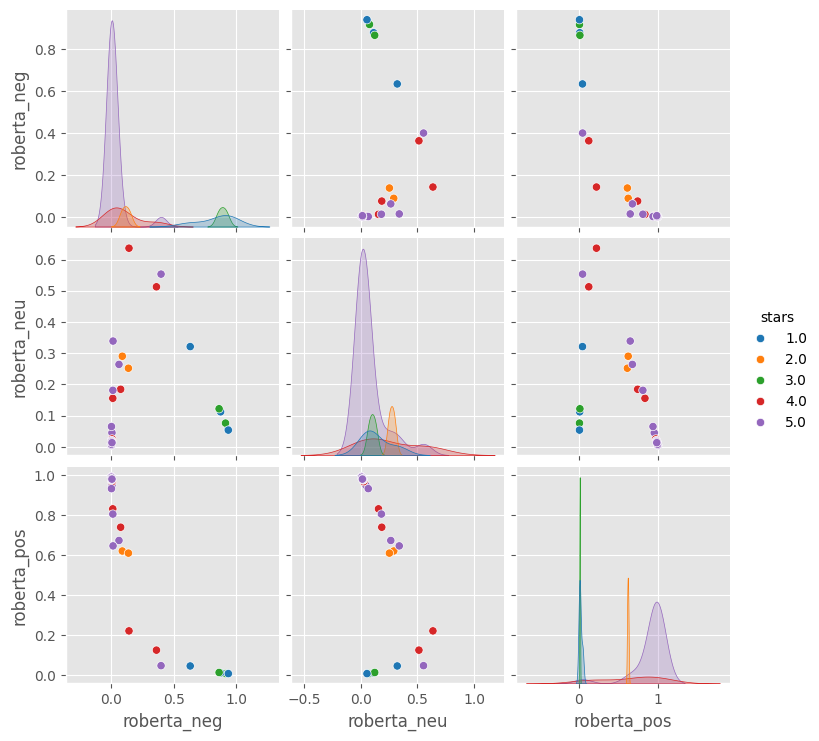

In [47]:
sns.pairplot(data=results_df,
             vars=['roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='stars',
            palette='tab10')
plt.show()

In [48]:
results_df.query('stars == 1') \
    .sort_values('roberta_pos', ascending=False)['text'].values[0]

'\r\nHard as a rock. Tried the "soften it in the mouth trick"- too sticky.  Tried the microwave thing, too gooey and then even harder.  Had to pitch.\r\n'

In [49]:
results_df.query('stars == 5') \
    .sort_values('roberta_neg', ascending=False)['text'].values[0]

'\r\ntasty, used for wedding favors\r\n'

## Extra: the transformers pipeline

In [50]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
C:\Users\biabc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


#### Testing the model prediction

In [51]:
sent_pipeline('I love sentiment analysis!')

[{'label': 'POSITIVE', 'score': 0.9997853636741638}]

In [52]:
sent_pipeline('booo')

[{'label': 'NEGATIVE', 'score': 0.9936267137527466}]

## Using Textblob

In [53]:
!pip install -U textblob

Defaulting to user installation because normal site-packages is not writeable


In [54]:
!pip install deep-translator

Defaulting to user installation because normal site-packages is not writeable


In [55]:
from textblob import TextBlob
from deep_translator import GoogleTranslator
import pandas as pd

In [56]:
import nltk
from nltk.tokenize import word_tokenize
import string
from textblob import TextBlob, Word
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\biabc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\biabc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\biabc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Testing deep_translator for translating port -->> eng

In [57]:
tradutor = GoogleTranslator(source= "pt", target= "en")

In [58]:
text = "Eu ODEIO essa música! Mas a letra é muito boa"
traducao = tradutor.translate(text)
blob = TextBlob(traducao)

In [59]:
polarity = blob.sentiment.polarity
subjectivity = blob.sentiment.subjectivity

print(polarity)
print(subjectivity)
print(blob.sentiment)

-0.04500000000000004
0.8400000000000001
Sentiment(polarity=-0.04500000000000004, subjectivity=0.8400000000000001)


In [60]:
df_eng_n = pd.read_csv('datasets/NEGATIVE_B0BVB5PTDK.csv', sep=';')
df_eng_p = pd.read_csv('datasets/POSITIVE_B0BVB5PTDK.csv', sep=';')

df_eng = df_eng_n + df_eng_p

In [61]:
df_eng

,username,title,model,verified,date,region,text,stars,id
0,DaveLs,"Awesome vacuum, offensive customer supportwhat...",Color: BlackColor: White,Verified PurchaseVerified Purchase,"September 8, 2023December 23, 2023",United StatesUnited States,\r\nThe vacuum does a great job when it is wor...,6.0,B0BVB5PTDKB0BVB5PTDK
1,ryan flournoylizaq,Actually Not That GreatThe bomb!!!,Color: WhiteColor: Black,Verified PurchaseVerified Purchase,"March 11, 2024December 10, 2023",United StatesUnited States,\r\nMy dogs rarely make a mistake inside but t...,8.0,B0BVB5PTDKB0BVB5PTDK
2,TanmayArynBergman,Will not connect to wifi if the password has s...,Color: WhiteColor: Black,Verified PurchaseVerified Purchase,"November 27, 2023September 3, 2023",United StatesUnited States,\r\nI was forced to change my wifi password to...,8.0,B0BVB5PTDKB0BVB5PTDK
3,Charles H.In Awe,"WHEN WORKING - ITS AMAZING, HOWEVER BAD FOR PE...",Color: WhiteColor: Black,Verified PurchaseVerified Purchase,"December 28, 2023August 14, 2023",United StatesUnited States,"\r\nThis product works super well, ONLY when a...",8.0,B0BVB5PTDKB0BVB5PTDK
4,Scott196941J. Dyer,Cool features - not as smart as it should be f...,Color: BlackColor: White,Verified PurchaseVerified Purchase,"January 6, 2024February 9, 2024",United StatesUnited States,\r\nIt has great features like cliff sensor an...,7.0,B0BVB5PTDKB0BVB5PTDK
...,...,...,...,...,...,...,...,...,...
95,TaylorMT,You cannot access to WIFII'm in love with a va...,Color: BlackColor: White,Verified PurchaseVerified Purchase,"July 29, 2023October 26, 2023",United StatesUnited States,"\r\nWifi never works. If you are using Iphone,...",6.0,B0BVB5PTDKB0BVB5PTDK
96,HCKevin W,Doesn’t work with big houseAmazing tool for ke...,Color: WhiteColor: Black,Verified PurchaseVerified Purchase,"October 15, 2023September 29, 2023",United StatesUnited States,"\r\nWorst robot cleaner I’ve ever bought, does...",6.0,B0BVB5PTDKB0BVB5PTDK
97,M. VijayMichael Thomason,Received a damaged product.This thing is Great!,Color: BlackColor: Black,Verified PurchaseVerified Purchase,"April 27, 2023January 30, 2024",United StatesUnited States,\r\nI was super excited to use the product but...,6.0,B0BVB5PTDKB0BVB5PTDK
98,AlexCalifornia Gold,USED !!!!! THAT'S not brand new !!!!This Machi...,Color: WhiteColor: White,Verified PurchaseVerified Purchase,"December 11, 2023January 1, 2024",United StatesUnited States,\r\nUSED !!!!! THAT'S not brand new !!!!\r\n\r...,6.0,B0BVB5PTDKB0BVB5PTDK


In [76]:
translate = lambda x: GoogleTranslator(source= "en", target= "pt").translate(x) if len(x) < 5000 else print('Não foi possível traduzir')

df_port = df_eng.copy()

df_port['text'] = df_eng['text'].apply(translate)
df_port['title'] = df_eng['title'].apply(translate)

        

Não foi possível traduzir


In [78]:
df_port.head()

,username,title,model,verified,date,region,text,stars,id
0,DaveLs,"Vácuo incrível, suporte ao cliente ofensivo, o...",Color: BlackColor: White,Verified PurchaseVerified Purchase,"September 8, 2023December 23, 2023",United StatesUnited States,None,6.0,B0BVB5PTDKB0BVB5PTDK
1,ryan flournoylizaq,"Na verdade, não é tão bom. A bomba!!!",Color: WhiteColor: Black,Verified PurchaseVerified Purchase,"March 11, 2024December 10, 2023",United StatesUnited States,"Meus cães raramente cometem erros por dentro, ...",8.0,B0BVB5PTDKB0BVB5PTDK
2,TanmayArynBergman,Não conectará ao wifi se a senha tiver caracte...,Color: WhiteColor: Black,Verified PurchaseVerified Purchase,"November 27, 2023September 3, 2023",United StatesUnited States,Fui solicitado a alterar minha senha do wifi p...,8.0,B0BVB5PTDKB0BVB5PTDK
3,Charles H.In Awe,"AO TRABALHAR - É INCRÍVEL, PORÉM RUIM PARA EVI...",Color: WhiteColor: Black,Verified PurchaseVerified Purchase,"December 28, 2023August 14, 2023",United StatesUnited States,"Este produto funciona super bem, SOMENTE quand...",8.0,B0BVB5PTDKB0BVB5PTDK
4,Scott196941J. Dyer,Recursos interessantes - não tão inteligentes ...,Color: BlackColor: White,Verified PurchaseVerified Purchase,"January 6, 2024February 9, 2024",United StatesUnited States,"Possui ótimos recursos, como sensor de estress...",7.0,B0BVB5PTDKB0BVB5PTDK


In [79]:
df_port = df_port.dropna()

In [81]:
def sentences_tokenization(text):
  sentences = []
  blob = TextBlob(text)
  for sentence in blob.sentences:
    sentences.append(str(sentence))

  return sentences

In [97]:
df_port['sentences'] = df_port['text'].apply(sentences_tokenization)

C:\Users\biabc\AppData\Local\Temp\ipykernel_16232\645328927.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_port['sentences'] = df_port['text'].apply(sentences_tokenization)


In [98]:
df_port['token_pt'] = df_port['text'].apply(sentences_tokenization)

C:\Users\biabc\AppData\Local\Temp\ipykernel_16232\2824257086.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_port['token_pt'] = df_port['text'].apply(sentences_tokenization)


#### Using polarity to distinguish bad/good sentiments

In [99]:
def sentiment_analysis(sentences):
  sentiments = []
  for sentence in sentences:
    blob = TextBlob(sentence)
    sentiment = blob.sentiment.polarity
    sentiments.append(sentiment)

  return sentiments

In [100]:
df_port['sentences_sentiments'] = df_port['token_pt'].apply(sentiment_analysis)

C:\Users\biabc\AppData\Local\Temp\ipykernel_16232\3614435608.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_port['sentences_sentiments'] = df_port['token_pt'].apply(sentiment_analysis)


In [102]:
df_port['positive_sentences'] = df_port.apply(lambda x: [frase for frase, sentimento in zip(x['sentences'], x['sentences_sentiments']) if sentimento > 0], axis=1)

C:\Users\biabc\AppData\Local\Temp\ipykernel_16232\2263141460.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_port['positive_sentences'] = df_port.apply(lambda x: [frase for frase, sentimento in zip(x['sentences'], x['sentences_sentiments']) if sentimento > 0], axis=1)


In [101]:
df_port['negative_sentences'] = df_port.apply(lambda x: [frase for frase, sentimento in zip(x['sentences'], x['sentences_sentiments']) if sentimento < 0], axis=1)

C:\Users\biabc\AppData\Local\Temp\ipykernel_16232\4252779247.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_port['negative_sentences'] = df_port.apply(lambda x: [frase for frase, sentimento in zip(x['sentences'], x['sentences_sentiments']) if sentimento < 0], axis=1)


In [110]:
df_port.head()

,username,title,model,verified,date,region,text,stars,id,sentences,token_pt,sentences_sentiments,positive_sentences,negative_sentences
1,ryan flournoylizaq,"Na verdade, não é tão bom. A bomba!!!",Color: WhiteColor: Black,Verified PurchaseVerified Purchase,"March 11, 2024December 10, 2023",United StatesUnited States,"Meus cães raramente cometem erros por dentro, ...",8.0,B0BVB5PTDKB0BVB5PTDK,"[Meus cães raramente cometem erros por dentro,...","[Meus cães raramente cometem erros por dentro,...","[0.0, 0.0, 0.0, 0.0, 0.7, 0.0, 0.0, 0.0, 0.0, ...","[Além disso, tenho que passar por áreas com um...","[Até agora tem sido um ótimo investimento, que..."
2,TanmayArynBergman,Não conectará ao wifi se a senha tiver caracte...,Color: WhiteColor: Black,Verified PurchaseVerified Purchase,"November 27, 2023September 3, 2023",United StatesUnited States,Fui solicitado a alterar minha senha do wifi p...,8.0,B0BVB5PTDKB0BVB5PTDK,[Fui solicitado a alterar minha senha do wifi ...,[Fui solicitado a alterar minha senha do wifi ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[],[]
3,Charles H.In Awe,"AO TRABALHAR - É INCRÍVEL, PORÉM RUIM PARA EVI...",Color: WhiteColor: Black,Verified PurchaseVerified Purchase,"December 28, 2023August 14, 2023",United StatesUnited States,"Este produto funciona super bem, SOMENTE quand...",8.0,B0BVB5PTDKB0BVB5PTDK,"[Este produto funciona super bem, SOMENTE quan...","[Este produto funciona super bem, SOMENTE quan...","[0.3333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[Este produto funciona super bem, SOMENTE quan...",[]
4,Scott196941J. Dyer,Recursos interessantes - não tão inteligentes ...,Color: BlackColor: White,Verified PurchaseVerified Purchase,"January 6, 2024February 9, 2024",United StatesUnited States,"Possui ótimos recursos, como sensor de estress...",7.0,B0BVB5PTDKB0BVB5PTDK,"[Possui ótimos recursos, como sensor de estres...","[Possui ótimos recursos, como sensor de estres...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[],[Considere se você não pode colocar uma base e...
5,chrisAndrea Gonzalez,Decepcionado. Carece de desempenho e longevida...,Color: WhiteColor: Black,Verified PurchaseVerified Purchase,"February 6, 2024January 21, 2024",United StatesUnited States,A mídia não poderia ser informada.\r\n ...,8.0,B0BVB5PTDKB0BVB5PTDK,"[A mídia não poderia ser informada., Adquirido...","[A mídia não poderia ser informada., Adquirido...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[Atualização de março de 2024: O aspirador foi...,[Meu gato tem uma vingança contra ele e está s...


#### By the sentiments prediction, we can consider that the model does not work as well for portuguese reviews as it does in english.

In [115]:
positive_text = [str(frase) for frase in df_port['positive_sentences']]
positive_text = ' '.join(positive_text)

negative_text = [str(frase) for frase in df_port['negative_sentences']]
negative_text = ' '.join(negative_text)

stopwords = nltk.corpus.stopwords.words('portuguese')
punctuation = string.punctuation

positive_text = positive_text.lower()
negative_text = negative_text.lower()


wp = Word(positive_text)
lemma_pos = TextBlob(positive_text)
" ". join([w.lemmatize() for w in lemma_pos.words])

wn = Word(negative_text)
lemma_neg = TextBlob(negative_text)
" ". join([w.lemmatize() for w in lemma_neg.words])

pos_tokens = word_tokenize(positive_text)
neg_tokens = word_tokenize(negative_text)

# adding adjectives only restriction
# p_notadjectives = [token.text for token in doc_p if token.pos_ != "ADJ"]
# n_notadjectives = [token.text for token in doc_n if token.pos_ != "ADJ"]
# p_adjectives = [token.text for token in doc_p if token.pos_ == "ADJ"]
# n_adjectives = [token.text for token in doc_n if token.pos_ == "ADJ"]

pos_tokens = [word for word in pos_tokens if word not in stopwords and word ]
neg_tokens = [word for word in neg_tokens if word not in stopwords and word ]

clean_pos_tokens = []
clean_neg_tokens = []

for token in pos_tokens:
    clean_token = ''.join(char for char in token if char not in punctuation)
    if clean_token:
        clean_pos_tokens.append(clean_token)

for token in neg_tokens:
    clean_token = ''.join(char for char in token if char not in punctuation)
    if clean_token:
        clean_neg_tokens.append(clean_token)

In [116]:
print(clean_pos_tokens)

['além', 'disso', 'passar', 'áreas', 'aspirador', 'pó', 'desempenho', 'superior', 'este', 'produto', 'funciona', 'super', 'bem', 'somente', 'tudo', 'corre', 'bem', 'já', 'passaram', '6', 'semanas', 'hoje', 'esvaziei', 'saco', 'detritos', '2', 'australianos', 'golden', 'retriever', 'derramou', 'atualização', 'março', '2024', 'aspirador', 'enviado', 'conserto', 'levou', 'total', '3', 'semanas', 'receber', '“', 'consertado', '”', 'descartável', 'bom', 'saber', 'esvaziamento', 'lixo', 'alto', 'alto', 'aspirador', 'normal', 'perfeitamente', 'razoável', 'algo', 'queira', 'fazer', 'noite', 'durante', 'jantar', 'desative', 'horários', 'animal', 'estimação', 'ficar', 'doente', 'evitar', 'obstáculos', 'ótimo', 'ainda', 'consegue', 'detectar', 'poça', 'ração', 'estragada', 'irá', 'rastreála', 'toda', 'casa', 'casa', 'bastante', 'limpa', 'esfregue', 'frequência', 'lavagem', 'padrão', '20', 'minutos', 'bom', 'ainda', 'passa', 'muita', 'água', 'verifique', 'tanques', 'frequência', 'na', 'verdade', '

In [117]:
print(clean_neg_tokens)

['até', 'agora', 'sido', 'ótimo', 'investimento', 'consegui', 'desconto', '400', 'durante', 'semana', 'black', 'friday', 'então', 'venda', 'ocasional', 'considere', 'pode', 'colocar', 'base', 'pisos', 'cerâmica', 'madeira', 'meu', 'gato', 'vingança', 'contra', 'sempre', 'tirandoo', 'base', 'uma', 'escolhas', 'estranhas', 'roborock', 'fez', 'fazer', 'base', 'limpeza', 'sugasse', 'sujeira', 'lixeira', 'robô', 'voltasse', 'rolos', 'sai', 'caminho', 'onde', 'entrou', 'comprei', 'esfregações', 'extras', 'substitua', 'antes', 'cada', 'uso', 'configuração', 'retornar', 'base', 'limpar', 'esfregações', 'cada', '10', 'minutos', 'uso', 'fiquei', 'tão', 'satisfeito', 'robô', 'semana', 'passada', 'comprei', 's8', 'preço', 'venda', 'black', 'friday', 'manter', 'andar', 'cima', 'depois', 'disso', 'começamos', 'ter', 'muitos', 'problemas', 'ação', 'vácuo', 'originalmente', 'dizendo', 'entupido', 'conseguimos', 'encontrar', 'nada', 'base', 'vácuo', 'comportamento', 'estranho', 'energia', 'unidade', 'p

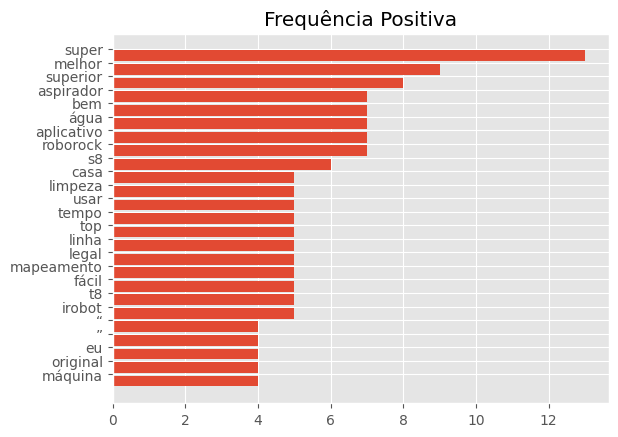

In [118]:
from collections import Counter

pos_freq = dict(Counter(clean_pos_tokens))
#pos_freq.pop('q')
#pos_freq.pop('pra')
pos_popular_words = sorted(pos_freq, key = pos_freq.get, reverse = True)

plt.barh(range(25), [pos_freq[w] for w in reversed(pos_popular_words[0:25])])
plt.yticks([x + 0.5 for x in range(25)], reversed(pos_popular_words[0:25]))
plt.title('Frequência Positiva')
plt.show()

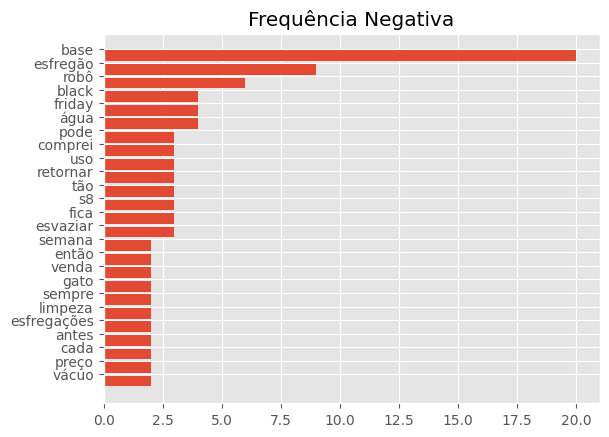

In [119]:
neg_freq = dict(Counter(clean_neg_tokens))
#neg_freq.pop('q')
pos_popular_words = sorted(neg_freq, key = neg_freq.get, reverse = True)

plt.barh(range(25), [neg_freq[w] for w in reversed(pos_popular_words[0:25])])
plt.yticks([x + 0.5 for x in range(25)], reversed(pos_popular_words[0:25]))
plt.title('Frequência Negativa')
plt.show()

In [120]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\biabc\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [128]:
negative_postag = nltk.tag.pos_tag(clean_neg_tokens)
positive_postag = nltk.tag.pos_tag(clean_pos_tokens)

df_port_postag = pd.DataFrame(negative_postag+positive_postag, columns=['word', 'postag'])

df_port_postag.head()

,word,postag
0,até,NN
1,agora,NNS
2,sido,VBP
3,ótimo,JJ
4,investimento,NN


In [130]:
adjectives = []

for i in range(len(df_port_postag['postag'])):
    if df_port_postag['postag'][i] in ['JJ', 'JJR', 'JJS']:
        adjectives.append(df_port_postag['word'][i])

adjectives

['ótimo',
 'semana',
 'black',
 'venda',
 'ocasional',
 'contra',
 'cada',
 'uso',
 'uso',
 'venda',
 'black',
 'nada',
 'unidade',
 'principal',
 'salta',
 'frente',
 'nessa',
 'tão',
 'fundamental',
 'ficaram',
 'forte',
 'saco',
 'fenomenal',
 'seco',
 'nunca',
 'aspirador',
 'black',
 'uso',
 'limpeza',
 's7',
 's8',
 'pro',
 'ultra',
 'deixam',
 'terminar',
 's8',
 'pro',
 'ultra',
 'esfregão',
 'tapete',
 'acho',
 'volta',
 'interações',
 'comprei',
 'black',
 'ean',
 'esvaziar',
 'nova',
 'novo',
 'porque',
 'superior',
 'funciona',
 'super',
 'hoje',
 'esvaziei',
 'australianos',
 'golden',
 'total',
 'semanas',
 'lixo',
 'alto',
 'normal',
 'noite',
 'desative',
 'animal',
 'estimação',
 'verdade',
 'super',
 'limpeza',
 'usar',
 'normal',
 'frequência',
 'uso',
 'upload',
 'original',
 'enviar',
 'substituto',
 'equipe',
 'original',
 'original',
 'carpete',
 'top',
 'limpe',
 'há',
 'limpar',
 'esfregar',
 'colar',
 'onde',
 'impressionar',
 'lidar',
 'top',
 'deixeme',
 'al

In [145]:
negative_adjectives = [word[0] for word in negative_postag if word[1] in ['JJ', 'JJR', 'JJS']]

positive_adjectives = [word[0] for word in positive_postag if word[1] in ['JJ', 'JJR', 'JJS']]


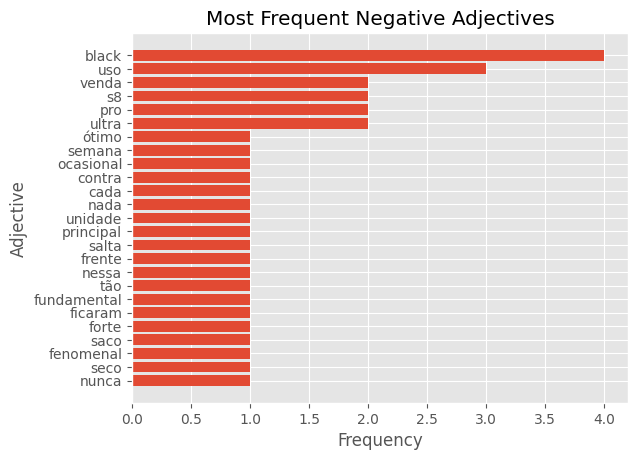

In [146]:
negative_adjectives_freq = dict(Counter(negative_adjectives))

negative_adjectives_popular_words = sorted(negative_adjectives_freq, key = negative_adjectives_freq.get, reverse = True)

plt.barh(range(25), [negative_adjectives_freq[w] for w in reversed(negative_adjectives_popular_words[0:25])])
plt.yticks(range(25), reversed(negative_adjectives_popular_words[0:25]))
plt.xlabel('Frequency')
plt.ylabel('Adjective')
plt.title('Most Frequent Negative Adjectives')
plt.show()

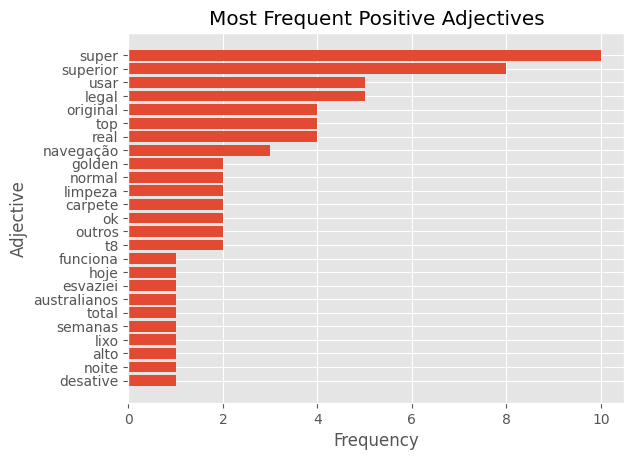

In [148]:
positive_adjectives_freq = dict(Counter(positive_adjectives))

positive_adjectives_popular_words = sorted(positive_adjectives_freq, key = positive_adjectives_freq.get, reverse = True)

plt.barh(range(25), [positive_adjectives_freq[w] for w in reversed(positive_adjectives_popular_words[0:25])])
plt.yticks(range(25), reversed(positive_adjectives_popular_words[0:25]))
plt.xlabel('Frequency')
plt.ylabel('Adjective')
plt.title('Most Frequent Positive Adjectives')
plt.show()

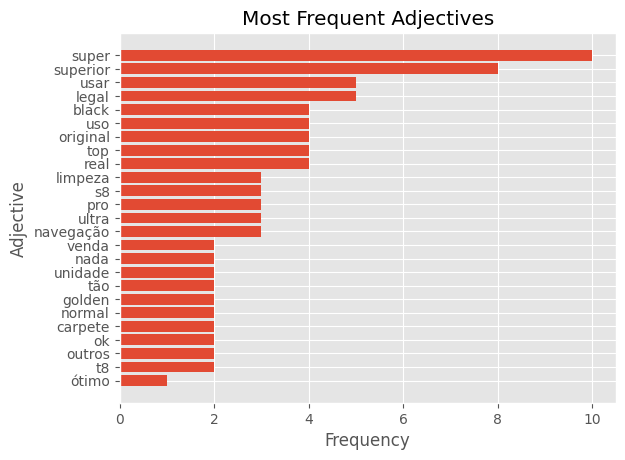

In [149]:
all_adjectives_freq = dict(Counter(adjectives))

all_adjectives_popular_words = sorted(all_adjectives_freq, key = all_adjectives_freq.get, reverse = True)

plt.barh(range(25), [all_adjectives_freq[w] for w in reversed(all_adjectives_popular_words[0:25])])
plt.yticks(range(25), reversed(all_adjectives_popular_words[0:25]))
plt.xlabel('Frequency')
plt.ylabel('Adjective')
plt.title('Most Frequent Adjectives')
plt.show()


## Comparing with NRC Lexicon(NOT AI)

In [150]:
!pip install NRCLex

Defaulting to user installation because normal site-packages is not writeable
INFO: pip is looking at multiple versions of nrclex to determine which version is compatible with other requirements. This could take a while.
     ---------------------------------------- 0.0/396.4 kB ? eta -:--:--
     - ----------------------------------- 20.5/396.4 kB 640.0 kB/s eta 0:00:01
     --- --------------------------------- 41.0/396.4 kB 653.6 kB/s eta 0:00:01
     ------------- ------------------------ 143.4/396.4 kB 1.1 MB/s eta 0:00:01
     --------------------- ---------------- 225.3/396.4 kB 1.4 MB/s eta 0:00:01
     -------------------------------------- 396.4/396.4 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for NRCLex: filename=NRCLex-3.0.0-py3-none-any.whl size=43341 sha256=8612fb823c07d4e8799e7ceb727df90b61b11a9477b9d34447cee3bf89aac049
  Stored in directory: c:\users\biabc\appdata\local\pi

In [151]:
# Import required modules
from nrclex import NRCLex
from collections import Counter

In [152]:
df_port

,username,title,model,verified,date,region,text,stars,id,sentences,token_pt,sentences_sentiments,positive_sentences,negative_sentences
1,ryan flournoylizaq,"Na verdade, não é tão bom. A bomba!!!",Color: WhiteColor: Black,Verified PurchaseVerified Purchase,"March 11, 2024December 10, 2023",United StatesUnited States,"Meus cães raramente cometem erros por dentro, ...",8.0,B0BVB5PTDKB0BVB5PTDK,"[Meus cães raramente cometem erros por dentro,...","[Meus cães raramente cometem erros por dentro,...","[0.0, 0.0, 0.0, 0.0, 0.7, 0.0, 0.0, 0.0, 0.0, ...","[Além disso, tenho que passar por áreas com um...","[Até agora tem sido um ótimo investimento, que..."
2,TanmayArynBergman,Não conectará ao wifi se a senha tiver caracte...,Color: WhiteColor: Black,Verified PurchaseVerified Purchase,"November 27, 2023September 3, 2023",United StatesUnited States,Fui solicitado a alterar minha senha do wifi p...,8.0,B0BVB5PTDKB0BVB5PTDK,[Fui solicitado a alterar minha senha do wifi ...,[Fui solicitado a alterar minha senha do wifi ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[],[]
3,Charles H.In Awe,"AO TRABALHAR - É INCRÍVEL, PORÉM RUIM PARA EVI...",Color: WhiteColor: Black,Verified PurchaseVerified Purchase,"December 28, 2023August 14, 2023",United StatesUnited States,"Este produto funciona super bem, SOMENTE quand...",8.0,B0BVB5PTDKB0BVB5PTDK,"[Este produto funciona super bem, SOMENTE quan...","[Este produto funciona super bem, SOMENTE quan...","[0.3333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[Este produto funciona super bem, SOMENTE quan...",[]
4,Scott196941J. Dyer,Recursos interessantes - não tão inteligentes ...,Color: BlackColor: White,Verified PurchaseVerified Purchase,"January 6, 2024February 9, 2024",United StatesUnited States,"Possui ótimos recursos, como sensor de estress...",7.0,B0BVB5PTDKB0BVB5PTDK,"[Possui ótimos recursos, como sensor de estres...","[Possui ótimos recursos, como sensor de estres...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[],[Considere se você não pode colocar uma base e...
5,chrisAndrea Gonzalez,Decepcionado. Carece de desempenho e longevida...,Color: WhiteColor: Black,Verified PurchaseVerified Purchase,"February 6, 2024January 21, 2024",United StatesUnited States,A mídia não poderia ser informada.\r\n ...,8.0,B0BVB5PTDKB0BVB5PTDK,"[A mídia não poderia ser informada., Adquirido...","[A mídia não poderia ser informada., Adquirido...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[Atualização de março de 2024: O aspirador foi...,[Meu gato tem uma vingança contra ele e está s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,TaylorMT,Você não pode acessar o WIFI. Estou apaixonado...,Color: BlackColor: White,Verified PurchaseVerified Purchase,"July 29, 2023October 26, 2023",United StatesUnited States,Wifi nunca funciona. Se você estiver usando Ip...,6.0,B0BVB5PTDKB0BVB5PTDK,"[Wifi nunca funciona., Se você estiver usando ...","[Wifi nunca funciona., Se você estiver usando ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[Tem sido super fácil limpar/trocar/encher os ...,[]
96,HCKevin W,Não funciona com casa grande. Ferramenta incrí...,Color: WhiteColor: Black,Verified PurchaseVerified Purchase,"October 15, 2023September 29, 2023",United StatesUnited States,"O pior robô limpador que já comprei, nem compl...",6.0,B0BVB5PTDKB0BVB5PTDK,"[O pior robô limpador que já comprei, nem comp...","[O pior robô limpador que já comprei, nem comp...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[],[]
97,M. VijayMichael Thomason,Recebeu um produto danificado. Essa coisa é ót...,Color: BlackColor: Black,Verified PurchaseVerified Purchase,"April 27, 2023January 30, 2024",United StatesUnited States,"Fiquei super animado para usar o produto, mas ...",6.0,B0BVB5PTDKB0BVB5PTDK,"[Fiquei super animado para usar o produto, mas...","[Fiquei super animado para usar o produto, mas...","[0.3333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[Fiquei super animado para usar o produto, mas...",[]
98,A

In [153]:
df_port = df_port.dropna()

In [154]:
texts = [text for text in df_port['text']] # putting reviews in a list

emotions = []

for text in texts:  # Here we give the song the average emotion in it

    e = NRCLex(text)
    if e.affect_list:  # Verifica se a lista não está vazia
        mode = max(e.affect_list, key=Counter(e.affect_list).get)
        emotions.append(mode)
    else:
        ind = df_port.loc[df_port['text'] == text].index
        df_port = df_port.drop(ind) # remove songs wich do not contain valid lyrics

df_port['Emotion'] = emotions

In [156]:
df_port.head()

,username,title,model,verified,date,region,text,stars,id,sentences,token_pt,sentences_sentiments,positive_sentences,negative_sentences,Emotion
1,ryan flournoylizaq,"Na verdade, não é tão bom. A bomba!!!",Color: WhiteColor: Black,Verified PurchaseVerified Purchase,"March 11, 2024December 10, 2023",United StatesUnited States,"Meus cães raramente cometem erros por dentro, ...",8.0,B0BVB5PTDKB0BVB5PTDK,"[Meus cães raramente cometem erros por dentro,...","[Meus cães raramente cometem erros por dentro,...","[0.0, 0.0, 0.0, 0.0, 0.7, 0.0, 0.0, 0.0, 0.0, ...","[Além disso, tenho que passar por áreas com um...","[Até agora tem sido um ótimo investimento, que...",positive
2,TanmayArynBergman,Não conectará ao wifi se a senha tiver caracte...,Color: WhiteColor: Black,Verified PurchaseVerified Purchase,"November 27, 2023September 3, 2023",United StatesUnited States,Fui solicitado a alterar minha senha do wifi p...,8.0,B0BVB5PTDKB0BVB5PTDK,[Fui solicitado a alterar minha senha do wifi ...,[Fui solicitado a alterar minha senha do wifi ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[],[],positive
3,Charles H.In Awe,"AO TRABALHAR - É INCRÍVEL, PORÉM RUIM PARA EVI...",Color: WhiteColor: Black,Verified PurchaseVerified Purchase,"December 28, 2023August 14, 2023",United StatesUnited States,"Este produto funciona super bem, SOMENTE quand...",8.0,B0BVB5PTDKB0BVB5PTDK,"[Este produto funciona super bem, SOMENTE quan...","[Este produto funciona super bem, SOMENTE quan...","[0.3333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[Este produto funciona super bem, SOMENTE quan...",[],trust
4,Scott196941J. Dyer,Recursos interessantes - não tão inteligentes ...,Color: BlackColor: White,Verified PurchaseVerified Purchase,"January 6, 2024February 9, 2024",United StatesUnited States,"Possui ótimos recursos, como sensor de estress...",7.0,B0BVB5PTDKB0BVB5PTDK,"[Possui ótimos recursos, como sensor de estres...","[Possui ótimos recursos, como sensor de estres...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[],[Considere se você não pode colocar uma base e...,positive
5,chrisAndrea Gonzalez,Decepcionado. Carece de desempenho e longevida...,Color: WhiteColor: Black,Verified PurchaseVerified Purchase,"February 6, 2024January 21, 2024",United StatesUnited States,A mídia não poderia ser informada.\r\n ...,8.0,B0BVB5PTDKB0BVB5PTDK,"[A mídia não poderia ser informada., Adquirido...","[A mídia não poderia ser informada., Adquirido...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[Atualização de março de 2024: O aspirador foi...,[Meu gato tem uma vingança contra ele e está s...,trust


In [168]:
mean_emotion_vacum_port = df_port['Emotion'].value_counts()

mean_emotion_vacum_port

Emotion
positive        30
trust           18
negative         6
anger            4
joy              3
anticipation     2
Name: count, dtype: int64

### Repeating the process for the english version

In [166]:
df_eng = df_eng.dropna()

In [167]:
texts = [text for text in df_eng['text']] # putting reviews in a list

emotions = []

for text in texts:  # Here we give the song the average emotion in it

    e = NRCLex(text)
    if e.affect_list:  # Verifica se a lista não está vazia
        mode = max(e.affect_list, key=Counter(e.affect_list).get)
        emotions.append(mode)
    else:
        ind = df_eng.loc[df_eng['text'] == text].index
        df_eng = df_eng.drop(ind) # remove songs wich do not contain valid lyrics

df_eng['Emotion'] = emotions

In [169]:
mean_emotion_vacum_eng = df_eng['Emotion'].value_counts()
mean_emotion_vacum_eng

Emotion
positive        71
negative        13
trust            8
anger            2
joy              1
fear             1
anticipation     1
Name: count, dtype: int64

- By that we notice that in portuguese he had difficulties classifying the fellings, again because english is most used in libs 

### Lastly for the B006K2ZZ7K(salt water taffy) used in the beggining

In [161]:
texts = [text for text in results_df['text']] # putting reviews in a list

emotions = []

for text in texts:  # Here we give the song the average emotion in it

    e = NRCLex(text)
    if e.affect_list:  # Verifica se a lista não está vazia
        mode = max(e.affect_list, key=Counter(e.affect_list).get)
        emotions.append(mode)
    else:
        ind = results_df.loc[results_df['text'] == text].index
        results_df = results_df.drop(ind) # remove songs wich do not contain valid lyrics

results_df['Emotion'] = emotions

In [163]:
results_df.head()

,Id,roberta_neg,roberta_neu,roberta_pos,username,title,model,verified,date,region,text,stars,product_id,origem,Emotion
0,0,0.934816,0.057157,0.008027,Cyn,Would not recommend,0,Verified Purchase,"July 24, 2013",United States,\r\nThe taffy arrived in one big lump. The wax...,1.0,B006K2ZZ7K,negative,negative
1,1,0.916286,0.076291,0.007423,Machelle,Could be better,0,Verified Purchase,"June 16, 2016",United States,\r\nSoft taffy in a large variety of flavors. ...,3.0,B006K2ZZ7K,negative,anticipation
2,2,0.088879,0.290511,0.620609,Lewis,Good taffy but sticks to wrapper,0,Verified Purchase,"April 17, 2013",United States,\r\nThe taffy was received on time and in good...,2.0,B006K2ZZ7K,negative,positive
4,4,0.137900,0.252092,0.610008,Claire M,I did enjoy some of the flavors so they get tw...,0,Verified Purchase,"June 21, 2017",United States,\r\nLots of the candy arrived poorly wrapped a...,2.0,B006K2ZZ7K,negative,anticipation
5,5,0.864869,0.122268,0.012863,Amanda,"Large bag, not great",0,Verified Purchase,"August 15, 2017",United States,"\r\nLarge bag, however the taffy is not very g...",3.0,B006K2ZZ7K,negative,anticipation


In [164]:
mean_emotion = results_df['Emotion'].value_counts()

mean_emotion

Emotion
anticipation    10
positive         7
joy              7
negative         4
surprise         2
anger            1
Name: count, dtype: int64

## Fontes/Ideias

Análise de sentimentos em português utilizando Pytorch e Python

* [Parte 1](https://medium.com/data-hackers/an%C3%A1lise-de-sentimentos-em-portugu%C3%AAs-utilizando-pytorch-e-python-91a232165ec0)

* [Parte 2](https://medium.com/data-hackers/deploy-de-um-modelo-de-an%C3%A1lise-de-sentimentos-como-uma-rest-api-878c175ad24f)

---

[Construindo um analisador de sentimentos em python](https://acadianschool.com.br/construindo-um-analisador-de-sentimentos-em-python/)

---

[AIpp](https://github.com/TailUFPB/AIpp/tree/main)

---

[tradutor de texto em python](https://www.hashtagtreinamentos.com/tradutor-de-texto-em-python#:~:text=Utilizaremos%20a%20biblioteca%20Deep%2Dtranslator,podemos%20fazer%20no%20pr%C3%B3prio%20site.)

---

[swiftclassifier](https://github.com/biabcaval/swiftclassifier/tree/main)

In [ ]:
# tentar pegar apenas adjetivos para retornar palavras mais utilizadas
# retornar a média das reviews
# criar interação com usuário